In [1]:
import pandas as pd
import numpy as np
import scipy.stats

In [2]:
df = pd.read_excel("../데이터자료/join_data.xlsx",index_col=0)
df_data=df[['DateTime', '종가_ex','1Y_Mid_irs','2Y_Mid_irs','3Y_Mid_irs','5Y_Mid_irs','10Y_Mid_irs',
 '1Y_Mid_crs','2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs', '국고1년','국고3년','국고5년','국고10년','통안364일','통안2년', 
 '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스','10Y_베이시스','M1_스왑포인트', 'Mid_ndf']]
df_data

,DateTime,종가_ex,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,10Y_Mid_irs,1Y_Mid_crs,2Y_Mid_crs,3Y_Mid_crs,...,국고10년,통안364일,통안2년,1Y_베이시스,2Y_베이시스,3Y_베이시스,5Y_베이시스,10Y_베이시스,M1_스왑포인트,Mid_ndf
열1,,,,,,,,,,,,,,,,,,,,,
0,2012-08-01,1126.5,2.850,2.740,2.740,2.770,2.910,2.09,1.815,1.81,...,3.14,2.80,2.83,-76.0,-92.5,-93.0,-105.0,-108.0,260,1132.25
1,2012-08-02,1131.7,2.820,2.690,2.690,2.720,2.860,2.08,1.845,1.85,...,3.10,2.77,2.78,-74.0,-84.5,-84.0,-96.0,-99.0,250,1134.00
2,2012-08-03,1134.8,2.790,2.660,2.660,2.690,2.840,2.07,1.830,1.83,...,3.03,2.75,2.77,-72.0,-83.0,-83.0,-101.0,-112.0,240,1138.00
3,2012-08-06,1129.0,2.810,2.680,2.680,2.710,2.850,2.07,1.805,1.80,...,3.03,2.76,2.78,-74.0,-87.5,-88.0,-107.0,-117.0,240,1128.50
4,2012-08-07,1128.8,2.820,2.680,2.680,2.720,2.870,2.09,1.820,1.80,...,3.03,2.75,2.77,-73.0,-86.0,-88.0,-115.0,-127.0,250,1129.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2022-07-25,1313.7,3.165,3.235,3.205,3.125,2.965,2.55,2.730,2.71,...,3.21,2.98,3.09,-61.5,-50.5,-49.5,-61.5,-60.5,-60,1309.85
2456,2022-07-26,1307.6,3.155,3.215,3.175,3.095,2.935,2.56,2.700,2.68,...,3.18,2.99,3.09,-59.5,-51.5,-49.5,-60.5,-59.5,-70,1311.00
2457,2022-07-27,1313.3,3.145,3.165,3.115,3.035,2.875,2.57,2.690,2.67,...,3.12,3.01,3.08,-57.5,-47.5,-44.5,-55.5,-54.5,-55,1310.50


In [3]:
df_data.iloc[1968]

DateTime       2020-08-03
종가_ex              1193.4
1Y_Mid_irs          0.735
2Y_Mid_irs          0.755
3Y_Mid_irs          0.785
5Y_Mid_irs          0.835
10Y_Mid_irs         0.905
1Y_Mid_crs         -0.005
2Y_Mid_crs          -0.05
3Y_Mid_crs          -0.04
5Y_Mid_crs          -0.02
10Y_Mid_crs         0.215
국고1년                 0.65
국고3년                 0.79
국고5년                 1.04
국고10년                 1.3
통안364일               0.59
통안2년                 0.72
1Y_베이시스             -74.0
2Y_베이시스             -80.5
3Y_베이시스             -82.5
5Y_베이시스             -85.5
10Y_베이시스            -69.0
M1_스왑포인트              -10
Mid_ndf            1194.4
Name: 1968, dtype: object

In [4]:
x = df_data[['1Y_Mid_irs','2Y_Mid_irs','3Y_Mid_irs','5Y_Mid_irs','10Y_Mid_irs',
 '1Y_Mid_crs','2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs', '국고1년','국고3년','국고5년','국고10년','통안364일','통안2년', 
 'M1_스왑포인트', 'Mid_ndf']]
y = df_data["종가_ex"]
x.feature = x.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15124\41652747.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.feature = x.columns


,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,10Y_Mid_irs,1Y_Mid_crs,2Y_Mid_crs,3Y_Mid_crs,5Y_Mid_crs,10Y_Mid_crs,국고1년,국고3년,국고5년,국고10년,통안364일,통안2년,M1_스왑포인트,Mid_ndf
열1,,,,,,,,,,,,,,,,,,
0,1.698499,1.338892,1.283437,1.174219,1.124144,1.504029,1.113974,1.018950,0.669311,0.491325,1.736854,1.418482,1.193353,1.198149,1.685954,1.508426,1.997906,-0.056053
1,1.650985,1.262631,1.207185,1.099480,1.053058,1.487867,1.163299,1.083532,0.730623,0.550202,1.689516,1.356375,1.137069,1.136882,1.638991,1.430584,1.907434,-0.024147
2,1.603471,1.216874,1.161434,1.054636,1.024624,1.471705,1.138637,1.051241,0.607999,0.329413,1.657958,1.325322,1.038571,1.029664,1.607682,1.415016,1.816961,0.048782
3,1.635147,1.247378,1.191935,1.084532,1.038841,1.471705,1.097532,1.002804,0.546687,0.270536,1.673737,1.340848,1.038571,1.029664,1.623336,1.430584,1.816961,-0.124423
4,1.650985,1.247378,1.191935,1.099480,1.067275,1.504029,1.122195,1.002804,0.439391,0.152781,1.657958,1.340848,1.038571,1.029664,1.607682,1.415016,1.907434,-0.115307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2.197399,2.093880,1.992574,1.704865,1.202338,2.247491,2.618410,2.472060,1.880225,1.271447,1.894644,1.915335,1.305922,1.305367,1.967736,1.913203,-0.897226,3.181963
2456,2.181561,2.063375,1.946823,1.660022,1.159687,2.263654,2.569084,2.423623,1.849569,1.242008,1.910423,1.868755,1.277780,1.259417,1.983390,1.913203,-0.987699,3.202930
2457,2.165723,1.987114,1.855321,1.570335,1.074384,2.279816,2.552642,2.407478,1.834241,1.227289,1.910423,1.822175,1.207424,1.167516,2.014699,1.897634,-0.851990,3.193814


In [5]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.450e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:56:40   Log-Likelihood:                -6978.3
No. Observations:                2460   AIC:                         1.399e+04
Df Residuals:                    2441   BIC:                         1.411e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8905      0.084   1.36e+04      0.000    1134.727    1135.054
1Y_Mid_irs      1.5727      1.818      0.865      0.387      -1.992       5.137
2Y_Mid_irs     -1.9666      3.563     -0.552      0.581      -8.954       5.020
3Y_Mid_irs      1.4426      2.259      0.638      0.523      -2.988       5.873
5Y_Mid_irs      3.2807      3.225      1.017      0.309      -3.042       9.604
10Y_Mid_irs    -2.5267      1.905     -1.326      0.185      -6.262       1.209
1Y_Mid_crs     -2.0261      0.624     -3.249      0.001      -3.249      -0.803
2Y_Mid_crs      1.4599      1.914      0.763      0.446      -2.294       5.214
3Y_Mid_crs     -1.6439      1.706     -0.964      0.335      -4.989       1.701
5Y_Mid_crs      2.7677      1.281      2.161      0.031       0.257       5.279
10Y_Mid_crs    -2.1359      0.859     -2.486      0.013      -3.821      -0.451
국고1년            0.7155      1.261      0.568      0.570      -1.756       3.188
국고3년           -0.7257      1.163     -0.624      0.533      -3.006       1.555
국고5년            0.4162      1.228      0.339      0.735      -1.992       2.824
국고10년          -0.7425      1.292     -0.575      0.565      -3.276       1.791
통안364일         -0.1515      0.780     -0.194      0.846      -1.682       1.379
통안2년           -0.1321      0.911     -0.145      0.885      -1.918       1.654
M1_스왑포인트       -0.9974      0.176     -5.682      0.000      -1.342      -0.653
Mid_ndf        54.6322      0.155    351.351      0.000      54.327      54.937
==============================================================================
Omnibus:                      318.875   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1894.064
Skew:                           0.455   Prob(JB):                         0.00
Kurtosis:                       7.201   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

     VIF_Factor      Feature
0    473.305065   1Y_Mid_irs
1   1818.598942   2Y_Mid_irs
2    731.270745   3Y_Mid_irs
3   1489.448175   5Y_Mid_irs
4    519.877302  10Y_Mid_irs
5     55.706432   1Y_Mid_crs
6    524.960537   2Y_Mid_crs
7    416.842054   3Y_Mid_crs
8    234.921889   5Y_Mid_crs
9    105.730545  10Y_Mid_crs
10   227.658117         국고1년
11   193.790006         국고3년
12   216.055082         국고5년
13   239.042473        국고10년
14    87.253821       통안364일
15   118.864513         통안2년
16     4.413476     M1_스왑포인트
17     3.463483      Mid_ndf


In [7]:
x_scaled.drop(['2Y_Mid_irs'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.595e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:56:58   Log-Likelihood:                -6978.5
No. Observations:                2460   AIC:                         1.399e+04
Df Residuals:                    2442   BIC:                         1.410e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8905      0.084   1.36e+04      0.000    1134.727    1135.054
1Y_Mid_irs      0.8657      1.290      0.671      0.502      -1.663       3.394
3Y_Mid_irs      0.7621      1.893      0.403      0.687      -2.950       4.474
5Y_Mid_irs      2.4312      2.833      0.858      0.391      -3.124       7.987
10Y_Mid_irs    -2.1153      1.753     -1.207      0.228      -5.553       1.322
1Y_Mid_crs     -2.0156      0.623     -3.234      0.001      -3.238      -0.793
2Y_Mid_crs      1.4586      1.914      0.762      0.446      -2.295       5.212
3Y_Mid_crs     -1.6421      1.706     -0.963      0.336      -4.987       1.702
5Y_Mid_crs      2.7574      1.280      2.154      0.031       0.247       5.268
10Y_Mid_crs    -2.1434      0.859     -2.496      0.013      -3.828      -0.459
국고1년            0.8337      1.242      0.671      0.502      -1.602       3.269
국고3년           -0.8734      1.132     -0.772      0.440      -3.093       1.346
국고5년            0.1477      1.128      0.131      0.896      -2.063       2.359
국고10년          -0.5350      1.236     -0.433      0.665      -2.958       1.888
통안364일         -0.1218      0.778     -0.156      0.876      -1.648       1.405
통안2년           -0.2121      0.899     -0.236      0.814      -1.975       1.551
M1_스왑포인트       -0.9921      0.175     -5.661      0.000      -1.336      -0.648
Mid_ndf        54.6302      0.155    351.481      0.000      54.325      54.935
==============================================================================
Omnibus:                      318.768   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1895.430
Skew:                           0.454   Prob(JB):                         0.00
Kurtosis:                       7.203   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

     VIF_Factor      Feature
0    238.275432   1Y_Mid_irs
1    513.531221   3Y_Mid_irs
2   1150.099362   5Y_Mid_irs
3    440.312097  10Y_Mid_irs
4     55.654056   1Y_Mid_crs
5    524.959754   2Y_Mid_crs
6    416.840515   3Y_Mid_crs
7    234.871906   5Y_Mid_crs
8    105.704069  10Y_Mid_crs
9    221.098010         국고1년
10   183.530955         국고3년
11   182.161094         국고5년
12   218.794995        국고10년
13    86.838450       통안364일
14   115.850129         통안2년
15     4.400342     M1_스왑포인트
16     3.461643      Mid_ndf


In [9]:
x_scaled.drop(['5Y_Mid_irs'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.757e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:57:35   Log-Likelihood:                -6978.9
No. Observations:                2460   AIC:                         1.399e+04
Df Residuals:                    2443   BIC:                         1.409e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8905      0.084   1.36e+04      0.000    1134.727    1135.054
1Y_Mid_irs      0.9959      1.281      0.778      0.437      -1.515       3.507
3Y_Mid_irs      1.7931      1.463      1.226      0.220      -1.076       4.662
10Y_Mid_irs    -1.0151      1.195     -0.849      0.396      -3.359       1.329
1Y_Mid_crs     -1.9800      0.622     -3.184      0.001      -3.199      -0.761
2Y_Mid_crs      1.4525      1.914      0.759      0.448      -2.301       5.206
3Y_Mid_crs     -1.6828      1.705     -0.987      0.324      -5.026       1.660
5Y_Mid_crs      2.8644      1.274      2.248      0.025       0.366       5.363
10Y_Mid_crs    -2.1625      0.859     -2.519      0.012      -3.846      -0.479
국고1년            0.6251      1.218      0.513      0.608      -1.764       3.014
국고3년           -0.6971      1.113     -0.626      0.531      -2.879       1.485
국고5년           -0.0869      1.094     -0.079      0.937      -2.232       2.058
국고10년          -0.2051      1.174     -0.175      0.861      -2.508       2.098
통안364일         -0.1470      0.778     -0.189      0.850      -1.672       1.378
통안2년           -0.1126      0.892     -0.126      0.900      -1.861       1.636
M1_스왑포인트       -1.0310      0.169     -6.091      0.000      -1.363      -0.699
Mid_ndf        54.6496      0.154    355.400      0.000      54.348      54.951
==============================================================================
Omnibus:                      321.845   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1932.207
Skew:                           0.458   Prob(JB):                         0.00
Kurtosis:                       7.244   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor      Feature
0   234.977877   1Y_Mid_irs
1   306.731576   3Y_Mid_irs
2   204.792928  10Y_Mid_irs
3    55.408084   1Y_Mid_crs
4   524.952390   2Y_Mid_crs
5   416.517142   3Y_Mid_crs
6   232.645792   5Y_Mid_crs
7   105.633483  10Y_Mid_crs
8   212.630678         국고1년
9   177.483063         국고3년
10  171.450419         국고5년
11  197.619713        국고10년
12   86.714556       통안364일
13  113.922703         통안2년
14    4.106013     M1_스왑포인트
15    3.388489      Mid_ndf


In [11]:
x_scaled.drop(["3Y_Mid_irs"], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.941e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:58:04   Log-Likelihood:                -6979.6
No. Observations:                2460   AIC:                         1.399e+04
Df Residuals:                    2444   BIC:                         1.408e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8905      0.084   1.36e+04      0.000    1134.727    1135.054
1Y_Mid_irs      1.9199      1.035      1.855      0.064      -0.110       3.950
10Y_Mid_irs    -0.4463      1.102     -0.405      0.685      -2.607       1.714
1Y_Mid_crs     -1.9134      0.619     -3.089      0.002      -3.128      -0.699
2Y_Mid_crs      1.2500      1.907      0.655      0.512      -2.489       4.989
3Y_Mid_crs     -1.5048      1.699     -0.886      0.376      -4.836       1.826
5Y_Mid_crs      2.9980      1.270      2.361      0.018       0.508       5.488
10Y_Mid_crs    -2.2254      0.857     -2.596      0.009      -3.906      -0.545
국고1년            0.0925      1.138      0.081      0.935      -2.139       2.324
국고3년           -0.0866      0.995     -0.087      0.931      -2.038       1.865
국고5년           -0.4254      1.058     -0.402      0.688      -2.501       1.650
국고10년           0.0793      1.151      0.069      0.945      -2.178       2.337
통안364일         -0.2151      0.776     -0.277      0.782      -1.737       1.307
통안2년            0.1686      0.862      0.196      0.845      -1.521       1.858
M1_스왑포인트       -1.0842      0.164     -6.626      0.000      -1.405      -0.763
Mid_ndf        54.6653      0.153    356.706      0.000      54.365      54.966
==============================================================================
Omnibus:                      323.561   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1960.033
Skew:                           0.459   Prob(JB):                         0.00
Kurtosis:                       7.276   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor      Feature
0   153.513889   1Y_Mid_irs
1   173.927712  10Y_Mid_irs
2    54.985238   1Y_Mid_crs
3   521.040750   2Y_Mid_crs
4   413.494015   3Y_Mid_crs
5   230.942892   5Y_Mid_crs
6   105.255028  10Y_Mid_crs
7   185.572332         국고1년
8   141.929286         국고3년
9   160.519364         국고5년
10  189.901051        국고10년
11   86.272004       통안364일
12  106.377604         통안2년
13    3.836334     M1_스왑포인트
14    3.364965      Mid_ndf


In [14]:
x_scaled.drop([ "2Y_Mid_crs"], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.151e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:58:49   Log-Likelihood:                -6979.8
No. Observations:                2460   AIC:                         1.399e+04
Df Residuals:                    2445   BIC:                         1.408e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8905      0.084   1.36e+04      0.000    1134.727    1135.054
1Y_Mid_irs      1.8663      1.032      1.809      0.071      -0.157       3.890
10Y_Mid_irs    -0.4893      1.100     -0.445      0.656      -2.646       1.667
1Y_Mid_crs     -1.6409      0.459     -3.573      0.000      -2.541      -0.740
3Y_Mid_crs     -0.5356      0.836     -0.640      0.522      -2.176       1.105
5Y_Mid_crs      3.0876      1.262      2.447      0.014       0.613       5.562
10Y_Mid_crs    -2.2950      0.850     -2.699      0.007      -3.963      -0.627
국고1년            0.2605      1.109      0.235      0.814      -1.914       2.435
국고3년           -0.1454      0.991     -0.147      0.883      -2.089       1.798
국고5년           -0.3434      1.051     -0.327      0.744      -2.404       1.717
국고10년           0.0378      1.149      0.033      0.974      -2.216       2.292
통안364일         -0.2353      0.775     -0.303      0.762      -1.756       1.285
통안2년            0.1590      0.861      0.185      0.854      -1.530       1.848
M1_스왑포인트       -1.1249      0.151     -7.434      0.000      -1.422      -0.828
Mid_ndf        54.6638      0.153    356.778      0.000      54.363      54.964
==============================================================================
Omnibus:                      323.861   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1962.021
Skew:                           0.459   Prob(JB):                         0.00
Kurtosis:                       7.278   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor      Feature
0   152.554877   1Y_Mid_irs
1   173.313406  10Y_Mid_irs
2    30.221008   1Y_Mid_crs
3   100.268852   3Y_Mid_crs
4   228.263525   5Y_Mid_crs
5   103.642830  10Y_Mid_crs
6   176.164293         국고1년
7   140.776425         국고3년
8   158.276951         국고5년
9   189.325298        국고10년
10   86.136402       통안364일
11  106.346526         통안2년
12    3.281800     M1_스왑포인트
13    3.364223      Mid_ndf


In [16]:
x_scaled.drop([ "국고1년"], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.395e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:59:37   Log-Likelihood:                -6979.9
No. Observations:                2460   AIC:                         1.399e+04
Df Residuals:                    2446   BIC:                         1.407e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8905      0.084   1.36e+04      0.000    1134.727    1135.054
1Y_Mid_irs      1.9881      0.892      2.229      0.026       0.239       3.737
10Y_Mid_irs    -0.5148      1.094     -0.471      0.638      -2.660       1.631
1Y_Mid_crs     -1.6339      0.458     -3.566      0.000      -2.532      -0.736
3Y_Mid_crs     -0.5223      0.834     -0.626      0.531      -2.158       1.114
5Y_Mid_crs      3.0643      1.258      2.436      0.015       0.598       5.531
10Y_Mid_crs    -2.3145      0.846     -2.735      0.006      -3.974      -0.655
국고3년           -0.1868      0.975     -0.192      0.848      -2.099       1.725
국고5년           -0.2264      0.925     -0.245      0.807      -2.041       1.588
국고10년          -0.0061      1.134     -0.005      0.996      -2.230       2.217
통안364일         -0.1193      0.598     -0.200      0.842      -1.292       1.053
통안2년            0.1864      0.853      0.218      0.827      -1.487       1.860
M1_스왑포인트       -1.1197      0.150     -7.482      0.000      -1.413      -0.826
Mid_ndf        54.6529      0.146    374.631      0.000      54.367      54.939
==============================================================================
Omnibus:                      324.492   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1965.870
Skew:                           0.461   Prob(JB):                         0.00
Kurtosis:                       7.281   Cond. No.                         68.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor      Feature
0   114.065741   1Y_Mid_irs
1   171.621372  10Y_Mid_irs
2    30.093182   1Y_Mid_crs
3    99.806323   3Y_Mid_crs
4   226.849760   5Y_Mid_crs
5   102.654065  10Y_Mid_crs
6   136.330240         국고3년
7   122.763103         국고5년
8   184.320727        국고10년
9    51.242790       통안364일
10  104.393435         통안2년
11    3.211118     M1_스왑포인트
12    3.051159      Mid_ndf


In [18]:
x_scaled.drop([ "국고3년","국고5년","국고10년"], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 4.419e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:00:13   Log-Likelihood:                -6979.9
No. Observations:                2460   AIC:                         1.398e+04
Df Residuals:                    2449   BIC:                         1.405e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8905      0.083   1.36e+04      0.000    1134.727    1135.054
1Y_Mid_irs      2.0400      0.750      2.719      0.007       0.569       3.511
10Y_Mid_irs    -0.7519      0.550     -1.368      0.172      -1.830       0.326
1Y_Mid_crs     -1.6079      0.440     -3.658      0.000      -2.470      -0.746
3Y_Mid_crs     -0.5246      0.776     -0.676      0.499      -2.046       0.997
5Y_Mid_crs      3.0141      1.155      2.609      0.009       0.749       5.279
10Y_Mid_crs    -2.3111      0.797     -2.899      0.004      -3.874      -0.748
통안364일         -0.1585      0.532     -0.298      0.766      -1.202       0.885
통안2년           -0.0006      0.683     -0.001      0.999      -1.340       1.338
M1_스왑포인트       -1.1038      0.143     -7.727      0.000      -1.384      -0.824
Mid_ndf        54.6442      0.142    385.061      0.000      54.366      54.923
==============================================================================
Omnibus:                      324.548   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1965.161
Skew:                           0.461   Prob(JB):                         0.00
Kurtosis:                       7.280   Cond. No.                         50.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor      Feature
0   80.778451   1Y_Mid_irs
1   43.372236  10Y_Mid_irs
2   27.730598   1Y_Mid_crs
3   86.375783   3Y_Mid_crs
4  191.523166   5Y_Mid_crs
5   91.210340  10Y_Mid_crs
6   40.677106       통안364일
7   66.930695         통안2년
8    2.928505     M1_스왑포인트
9    2.890555      Mid_ndf


In [20]:
x_scaled.drop([ '통안364일', '통안2년'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 5.528e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:00:48   Log-Likelihood:                -6980.0
No. Observations:                2460   AIC:                         1.398e+04
Df Residuals:                    2451   BIC:                         1.403e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8905      0.083   1.36e+04      0.000    1134.727    1135.054
1Y_Mid_irs      1.8972      0.482      3.933      0.000       0.951       2.843
10Y_Mid_irs    -0.7566      0.487     -1.555      0.120      -1.711       0.197
1Y_Mid_crs     -1.6516      0.412     -4.006      0.000      -2.460      -0.843
3Y_Mid_crs     -0.4893      0.721     -0.678      0.498      -1.904       0.925
5Y_Mid_crs      3.0014      1.136      2.642      0.008       0.773       5.229
10Y_Mid_crs    -2.2940      0.793     -2.894      0.004      -3.848      -0.740
M1_스왑포인트       -1.0987      0.133     -8.243      0.000      -1.360      -0.837
Mid_ndf        54.6609      0.129    423.312      0.000      54.408      54.914
==============================================================================
Omnibus:                      322.727   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1954.396
Skew:                           0.457   Prob(JB):                         0.00
Kurtosis:                       7.270   Cond. No.                         43.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor      Feature
0   33.418420   1Y_Mid_irs
1   33.999398  10Y_Mid_irs
2   24.417069   1Y_Mid_crs
3   74.769907   3Y_Mid_crs
4  185.450145   5Y_Mid_crs
5   90.226874  10Y_Mid_crs
6    2.551743     M1_스왑포인트
7    2.395098      Mid_ndf


In [22]:
x_scaled.drop([ '3Y_Mid_crs', '10Y_Mid_crs',], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 7.349e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:01:20   Log-Likelihood:                -6984.6
No. Observations:                2460   AIC:                         1.398e+04
Df Residuals:                    2453   BIC:                         1.402e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8905      0.084   1.36e+04      0.000    1134.727    1135.054
1Y_Mid_irs      1.5942      0.465      3.429      0.001       0.683       2.506
10Y_Mid_irs    -1.1084      0.470     -2.356      0.019      -2.031      -0.186
1Y_Mid_crs     -1.2329      0.341     -3.611      0.000      -1.902      -0.563
5Y_Mid_crs      0.5771      0.294      1.963      0.050       0.001       1.153
M1_스왑포인트       -1.0791      0.126     -8.537      0.000      -1.327      -0.831
Mid_ndf        54.8908      0.102    536.410      0.000      54.690      55.091
==============================================================================
Omnibus:                      345.770   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2102.758
Skew:                           0.507   Prob(JB):                         0.00
Kurtosis:                       7.414   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor      Feature
0   30.953164   1Y_Mid_irs
1   31.691294  10Y_Mid_irs
2   16.696274   1Y_Mid_crs
3   12.371483   5Y_Mid_crs
4    2.288821     M1_스왑포인트
5    1.499792      Mid_ndf


In [25]:
x_scaled.drop(['10Y_Mid_irs',], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 8.802e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:02:01   Log-Likelihood:                -6987.3
No. Observations:                2460   AIC:                         1.399e+04
Df Residuals:                    2454   BIC:                         1.402e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8905      0.084   1.36e+04      0.000    1134.726    1135.054
1Y_Mid_irs     0.6623      0.245      2.707      0.007       0.183       1.142
1Y_Mid_crs    -0.6995      0.256     -2.734      0.006      -1.201      -0.198
5Y_Mid_crs     0.0235      0.177      0.133      0.894      -0.323       0.370
M1_스왑포인트      -1.2455      0.105    -11.867      0.000      -1.451      -1.040
Mid_ndf       54.9949      0.092    595.250      0.000      54.814      55.176
==============================================================================
Omnibus:                      357.468   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2223.255
Skew:                           0.525   Prob(JB):                         0.00
Kurtosis:                       7.538   Cond. No.                         7.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor     Feature
0    8.553717  1Y_Mid_irs
1    9.356628  1Y_Mid_crs
2    4.467907  5Y_Mid_crs
3    1.574886    M1_스왑포인트
4    1.220300     Mid_ndf


In [27]:
x_scaled.drop(['5Y_Mid_crs',], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.101e+05
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:02:31   Log-Likelihood:                -6987.4
No. Observations:                2460   AIC:                         1.398e+04
Df Residuals:                    2455   BIC:                         1.401e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8905      0.084   1.36e+04      0.000    1134.726    1135.054
1Y_Mid_irs     0.6711      0.235      2.852      0.004       0.210       1.133
1Y_Mid_crs    -0.6882      0.241     -2.851      0.004      -1.162      -0.215
M1_스왑포인트      -1.2450      0.105    -11.873      0.000      -1.451      -1.039
Mid_ndf       54.9933      0.092    600.298      0.000      54.814      55.173
==============================================================================
Omnibus:                      357.167   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2219.312
Skew:                           0.524   Prob(JB):                         0.00
Kurtosis:                       7.534   Cond. No.                         6.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled


def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor     Feature
0    7.920896  1Y_Mid_irs
1    8.332286  1Y_Mid_crs
2    1.572515    M1_스왑포인트
3    1.200278     Mid_ndf


In [30]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
x_train = x_scaled[:1968]
x_test = x_scaled[1968:]
y_train = y[:1968]
y_test = y[1968:]

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))

MSE : 15.109149833148376, RMSE :  3.887, MAE: 3.887
Variance score :  0.995


In [39]:
a = pd.DataFrame(y_pred)
b = pd.DataFrame(y_test)
b = b.reset_index(drop="열1")

In [52]:
a = np.log(a)
b = np.log(b)

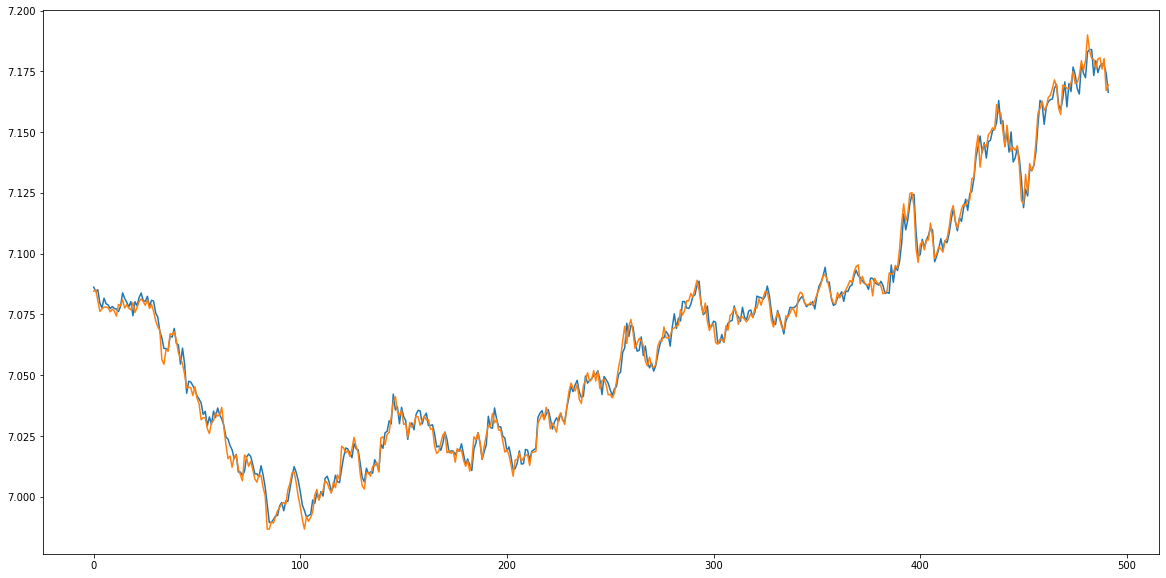

In [53]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
plt.plot(a)
plt.plot(b)


In [ ]:
x

,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,10Y_Mid_irs,1Y_Mid_crs,2Y_Mid_crs,3Y_Mid_crs,5Y_Mid_crs,10Y_Mid_crs,1Y_베이시스,M1_스왑포인트,Mid_ndf
열1,,,,,,,,,,,,,
0,2.850,2.740,2.740,2.770,2.910,2.09,1.815,1.81,1.72,1.83,-76.0,260,1132.25
1,2.820,2.690,2.690,2.720,2.860,2.08,1.845,1.85,1.76,1.87,-74.0,250,1134.00
2,2.790,2.660,2.660,2.690,2.840,2.07,1.830,1.83,1.68,1.72,-72.0,240,1138.00
3,2.810,2.680,2.680,2.710,2.850,2.07,1.805,1.80,1.64,1.68,-74.0,240,1128.50
4,2.820,2.680,2.680,2.720,2.870,2.09,1.820,1.80,1.57,1.60,-73.0,250,1129.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,3.165,3.235,3.205,3.125,2.965,2.55,2.730,2.71,2.51,2.36,-61.5,-60,1309.85
2456,3.155,3.215,3.175,3.095,2.935,2.56,2.700,2.68,2.49,2.34,-59.5,-70,1311.00
2457,3.145,3.165,3.115,3.035,2.875,2.57,2.690,2.67,2.48,2.33,-57.5,-55,1310.50
